<a href="https://colab.research.google.com/github/tyshaw12/machine-learning-proof/blob/main/Predicting_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Original Imports

#### Do not implement the first 4 lines unless on my specific PC, it will fail.

##### Pip install commands are only applicable in specific instances. It is not recommended that they be implemented.

In [88]:
## ONLY USE THIS IMPORT IF ON LOCAL RUNTIME
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.8/bin")
os.add_dll_directory(r"C:\Users\tysha\Downloads\cudnn-windows-x86_64-8.6.0.163_cuda11-archive\cudnn-windows-x86_64-8.6.0.163_cuda11-archive\bin")
import tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import csv
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
test = False

# Data preparation

In [143]:
cars = pd.read_csv('https://raw.githubusercontent.com/tyshaw12/machine-learning-proof/main/cars_working.csv')

cars.head(5)

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Seat_num,Door_num,Price
0,Mazda,CX-5,2018,5,NaN,2013.0,SUV,160000,2.2L,Manual,Diesel,5.0,5.0,8495
1,Nissan,Navara,2018,8,Black,2010.0,Pickup,143000,2.5L,Manual,Diesel,5.0,4.0,8900
2,Volvo,V70,2018,4,Black,2015.0,Estate,21653,2.4L,Manual,Diesel,5.0,5.0,16490
3,Volkswagen,TiguanAllspace,2018,2,Black,2018.0,SUV,5000,2.0L,Automatic,Diesel,7.0,5.0,31999
4,Ford,Ka,2018,5,NaN,2006.0,Hatchback,60000,1.3L,Manual,Petrol,5.0,3.0,895


In [90]:
def prep_data(df):
  df = df.dropna()
  df = df.replace('1mile', 1)
  df = df.replace('Uknown', 14758)
  if not test:
    df["Price"].astype(str).astype(int)
  df["Runned_Miles"].astype(str).astype(int)
# AVERAGE PRICE INPUT FROM EXCEL
  df = df.replace('9999999', 150000)
  # Drops
  df = df.drop(columns = ['Adv_month', 'Adv_year'])
  # Dummies
  df = pd.get_dummies(df, columns=['Maker','Genmodel','Color','Bodytype','Gearbox','Fuel_type','Door_num','Reg_year', 'Engin_size', 'Seat_num', 'Door_num'])

  if test:
    train_cols = list(X)
    for feat in train_cols:
      if feat not in list(mini_holdout):
        df[feat] = 0
    df = df.reindex(columns=train_cols)

    return df
  else:
    xy = df.drop(columns=["Price"])
    y = df.Price

    return (xy, y)

In [91]:
print(list(X))

['Runned_Miles', 'Maker_Abarth', 'Maker_AlfaRomeo', 'Maker_AstonMartin', 'Maker_Audi', 'Maker_BMW', 'Maker_Bentley', 'Maker_Cadillac', 'Maker_Chevrolet', 'Maker_Chrysler', 'Maker_Citroen', 'Maker_DS', 'Maker_Dacia', 'Maker_Daewoo', 'Maker_Daihatsu', 'Maker_Dodge', 'Maker_Ferrari', 'Maker_Fiat', 'Maker_Ford', 'Maker_GMC', 'Maker_GreatWall', 'Maker_Honda', 'Maker_Hummer', 'Maker_Hyundai', 'Maker_Infiniti', 'Maker_Isuzu', 'Maker_Jaguar', 'Maker_Jeep', 'Maker_Kia', 'Maker_Lamborghini', 'Maker_LandRover', 'Maker_Lexus', 'Maker_LondonTaxisInternational', 'Maker_Lotus', 'Maker_MG', 'Maker_MINI', 'Maker_Maserati', 'Maker_Maybach', 'Maker_Mazda', 'Maker_McLaren', 'Maker_Mercedes-Benz', 'Maker_Mitsubishi', 'Maker_Morgan', 'Maker_Nissan', 'Maker_Noble', 'Maker_Perodua', 'Maker_Peugeot', 'Maker_Porsche', 'Maker_Proton', 'Maker_Renault', 'Maker_Rolls-Royce', 'Maker_Rover', 'Maker_SEAT', 'Maker_SKODA', 'Maker_Saab', 'Maker_Smart', 'Maker_Ssangyong', 'Maker_Subaru', 'Maker_Suzuki', 'Maker_TVR', 'Make

In [92]:
X.head(5)

,Runned_Miles,Maker_Abarth,Maker_AlfaRomeo,Maker_AstonMartin,Maker_Audi,Maker_BMW,Maker_Bentley,Maker_Cadillac,Maker_Chevrolet,Maker_Chrysler,...,Seat_num_7.0,Seat_num_8.0,Seat_num_9.0,Seat_num_17.0,Door_num_2.0,Door_num_3.0,Door_num_4.0,Door_num_5.0,Door_num_6.0,Door_num_7.0
1,143000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21653,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,4478,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,56778,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [93]:
(X, y) = prep_data(cars)

In [94]:
#(df.applymap(type) == str).all(0)
#df.dtypes()

In [95]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
y_train

70178      2000
142714     7795
174113     2900
150433    10290
251397     5740
          ...  
152098    51491
151201     6695
17926      8995
19928     16000
130044     9999
Name: Price, Length: 70862, dtype: object

In [97]:
X_train

,Runned_Miles,Maker_Abarth,Maker_AlfaRomeo,Maker_AstonMartin,Maker_Audi,Maker_BMW,Maker_Bentley,Maker_Cadillac,Maker_Chevrolet,Maker_Chrysler,...,Seat_num_7.0,Seat_num_8.0,Seat_num_9.0,Seat_num_17.0,Door_num_2.0,Door_num_3.0,Door_num_4.0,Door_num_5.0,Door_num_6.0,Door_num_7.0
70178,80000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
142714,121061,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
174113,95976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
150433,27837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
251397,156000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152098,2999,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
151201,67700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17926,14893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19928,69905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
# MinMaxScaling

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

# HOLDOUT TEST

In [99]:
# To test holdout
test = False
should_test_holdout = False
if should_test_holdout:
  mini_holdout = pd.read_csv('https://raw.githubusercontent.com/tyshaw12/machine-learning-proof/main/cars_holdout.csv')
  mini_holdout = prep_data(mini_holdout)
  mini_holdout = norm.transform(mini_holdout)

  predictions = np.round(model.predict(mini_holdout),1)
  pred_df = pd.DataFrame(predictions, columns= ["predictions"])
  pred_df.to_csv("holdout-predictions.csv", index=False)
  download("holdout-predictions.csv")

# To test sample code for corporate example
should_test_sample = False
if should_test_sample:
  mini_holdout = pd.read_csv('https://raw.githubusercontent.com/tyshaw12/machine-learning-proof/main/test_net.csv')
  mini_holdout = prep_data(mini_holdout)
  mini_holdout = norm.transform(mini_holdout)

  predictions = np.round(model.predict(mini_holdout),1)
  pred_df = pd.DataFrame(predictions, columns= ["predictions"])
  pred_df.to_csv("sample-predictions.csv", index=False)
  download("holdout-predictions.csv")

# Neural Network Model Building

In [100]:
# PRE MODEL
##model = Sequential()

##model.add(Dense(128, input_dim=len(X_train[0]), activation='swish'))

#model.add(Dropout(.2))

#model.add(Dense(4, activation='swish'))

#model.add(Dropout(.5))

##model.add(Dense(1, activation='swish'))

# FINAL MODEL
def build_model():
  model = Sequential()

  model.add(Dense(256, input_dim=len(X_train1[0]), activation='relu'))

  model.add(Dropout(.5))

  model.add(Dense(128, activation='relu'))

  model.add(Dropout(.5))

  model.add(Dense(64, activation='relu'))

  model.add(Dense(1, activation='relu'))
  return model


# Model Compiling!

In [101]:
#opt = keras.optimizers.Adadelta(learning_rate=0.16)
opt = keras.optimizers.Adam()
model = build_model()

model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               254208    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 295,425
Trainable params: 295,425
Non-tr

# Model Fitting /  Running

In [103]:

X_train1 = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=25)

# Custom validation set
#history = model.fit(X_train, y_train, epochs=4000, validation_split=.30, batch_size=20, callbacks=[early_stop],shuffle=False)
history = model.fit(X_train, y_train, epochs=1000, validation_split=.35, batch_size=20, callbacks=[early_stop], shuffle=False)

Epoch 1/1000
2303/2303 [==============================] - 7s 3ms/step - loss: 270646976.0000 - mse: 270646976.0000 - val_loss: 150807952.0000 - val_mse: 150807952.0000
Epoch 2/1000
2303/2303 [==============================] - 7s 3ms/step - loss: 149214352.0000 - mse: 149214352.0000 - val_loss: 118158864.0000 - val_mse: 118158864.0000
Epoch 3/1000
2303/2303 [==============================] - 7s 3ms/step - loss: 131721544.0000 - mse: 131721544.0000 - val_loss: 112471088.0000 - val_mse: 112471088.0000
Epoch 4/1000
2303/2303 [==============================] - 7s 3ms/step - loss: 123180200.0000 - mse: 123180200.0000 - val_loss: 108919024.0000 - val_mse: 108919024.0000
Epoch 5/1000
2303/2303 [==============================] - 7s 3ms/step - loss: 119444960.0000 - mse: 119444960.0000 - val_loss: 107002272.0000 - val_mse: 107002272.0000
Epoch 6/1000
2303/2303 [==============================] - 7s 3ms/step - loss: 109003720.0000 - mse: 109003720.0000 - val_loss: 104085736.0000 - val_mse: 1040857

In [104]:
# Saving history
hist = pd.DataFrame(history.history)
hist = hist.reset_index()


# Plots and results

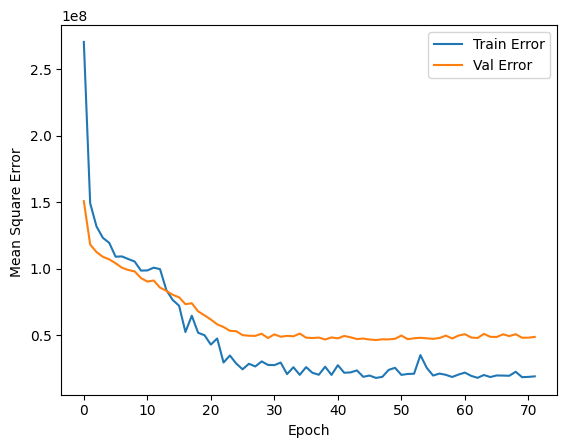

In [105]:
# Plot train/validation error, not the most effective on large datasets
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()

plot_history()

In [106]:
# Compile predictions
predictions = np.round(model.predict(X_test),1)

5167/5167 [==============================] - 9s 2ms/step


In [107]:
# R SQUARED
r2 = r2_score(y_test,predictions)
r2

0.9247737550107646

In [108]:
# Find mean squared error
result = mean_squared_error(y_test, predictions, squared=False)
result

5509.603706651915

In [109]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [110]:
cars = pd.read_csv('https://raw.githubusercontent.com/tyshaw12/machine-learning-proof/main/cars_working.csv')

In [111]:
def prep_data(df, train_cols=[]):
  test = len(train_cols) != 0
  df = df.dropna()
  df = df.replace('1mile', 1)
  df = df.replace('Uknown', 0)
  if not test:
    df["Price"].astype(str).astype(int)
  df["Runned_Miles"].astype(str).astype(int)
# AVERAGE PRICE INPUT FROM EXCEL
  df = df.replace('9999999', 150000)
  # Drops
  df = df.drop(columns = ['Adv_month', 'Adv_year'])
  # Dummies
  df = pd.get_dummies(df, columns=['Maker','Genmodel','Color','Bodytype','Gearbox','Fuel_type','Door_num','Reg_year', 'Engin_size', 'Seat_num', 'Door_num'])

  if test:
    df = X.align(df, join='inner', axis=1)
    print(train_cols[2])
    for feat in train_cols:
      print(feat)
      if feat not in list(df):
        df[feat] = 0
    df = df.reindex(columns=train_cols)

    return df
  else:
    X = df.drop(columns=["Price"])
    y = df.Price

    return (X, y)

In [112]:
(X, y) = prep_data(cars)
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)
y_train
X_train
#X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)

,Runned_Miles,Maker_Abarth,Maker_AlfaRomeo,Maker_AstonMartin,Maker_Audi,Maker_BMW,Maker_Bentley,Maker_Cadillac,Maker_Chevrolet,Maker_Chrysler,...,Seat_num_7.0,Seat_num_8.0,Seat_num_9.0,Seat_num_17.0,Door_num_2.0,Door_num_3.0,Door_num_4.0,Door_num_5.0,Door_num_6.0,Door_num_7.0
70178,80000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
142714,121061,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
174113,95976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
150433,27837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
251397,156000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152098,2999,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
151201,67700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17926,14893,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19928,69905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

In [122]:
cars.head(5)

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Seat_num,Door_num,Price
0,Mazda,CX-5,2018,5,NaN,2013.0,SUV,160000,2.2L,Manual,Diesel,5.0,5.0,8495
1,Nissan,Navara,2018,8,Black,2010.0,Pickup,143000,2.5L,Manual,Diesel,5.0,4.0,8900
2,Volvo,V70,2018,4,Black,2015.0,Estate,21653,2.4L,Manual,Diesel,5.0,5.0,16490
3,Volkswagen,TiguanAllspace,2018,2,Black,2018.0,SUV,5000,2.0L,Automatic,Diesel,7.0,5.0,31999
4,Ford,Ka,2018,5,NaN,2006.0,Hatchback,60000,1.3L,Manual,Petrol,5.0,3.0,895


[Text(0.5, 1.0, 'Prices per Color'),
 Text(0.5, 0, 'Color'),
 Text(0, 0.5, 'Price')]

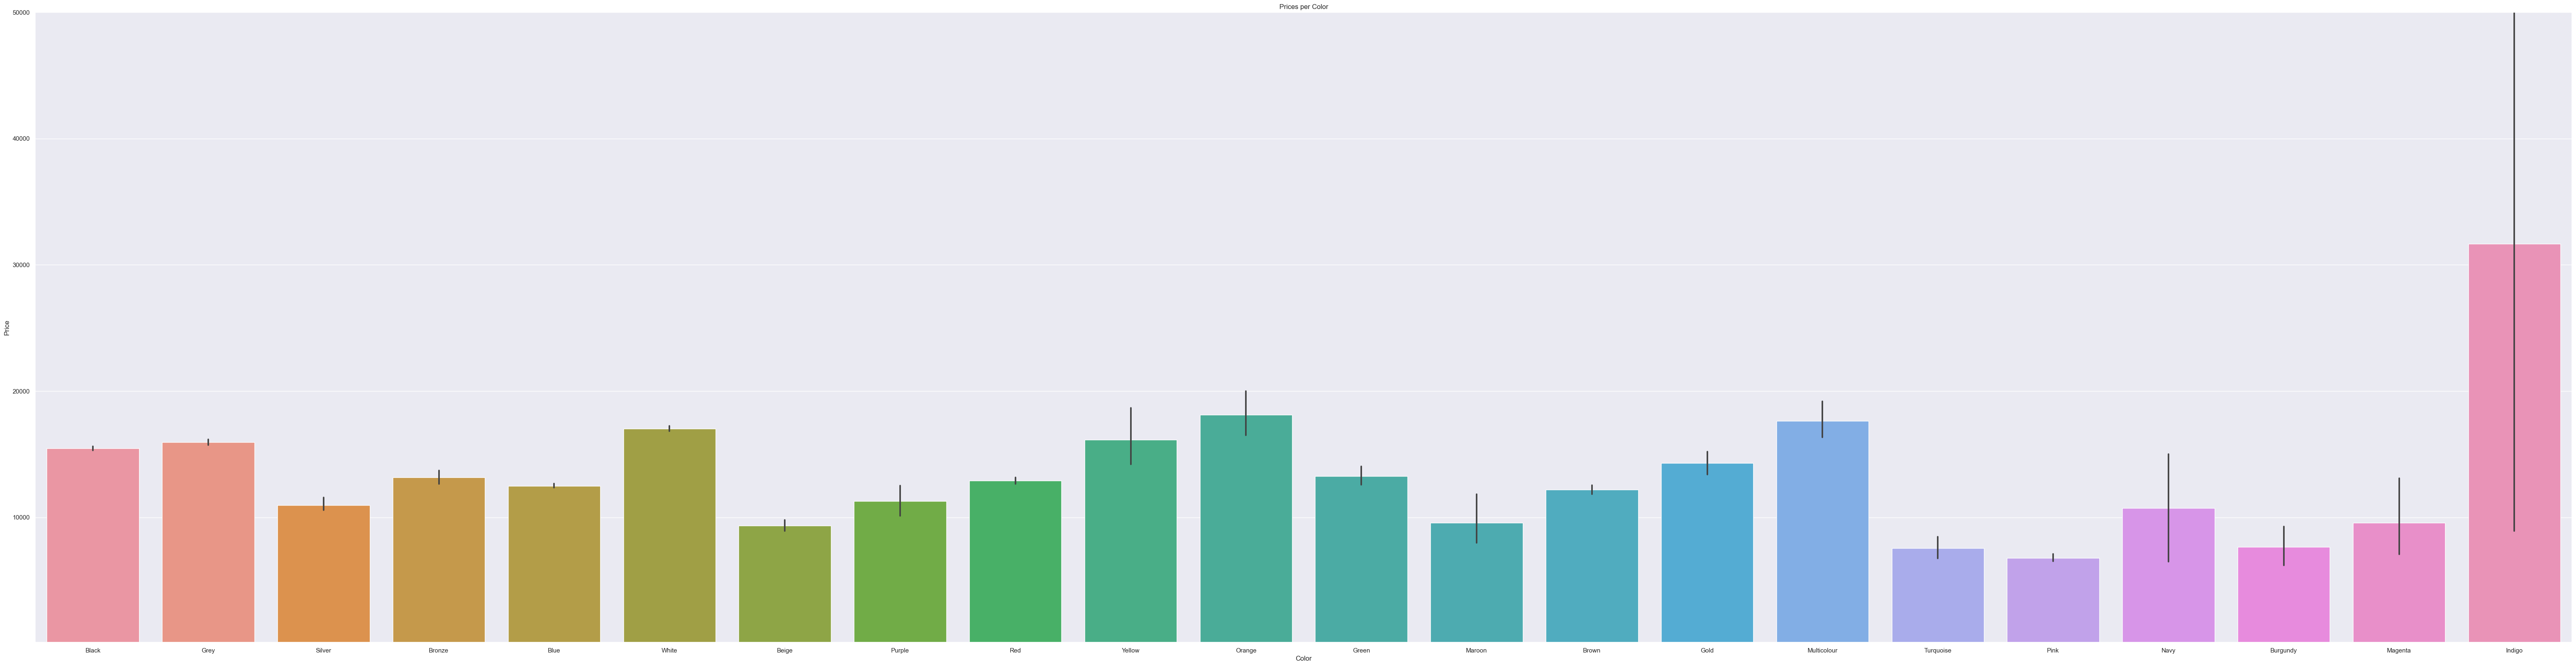

In [191]:
sns.set(rc={'figure.figsize':(80,20)})
plt.ylim(100, 50000)
sns.barplot(data=cars, x='Color', y='Price').set(title="Prices per Color",xlabel="Color", ylabel="Price")
#sns.barplot(data=cars, x='Maker', y='Price').set(title="Prices per Color",xlabel="Color", ylabel="Price")



KeyboardInterrupt: ignored

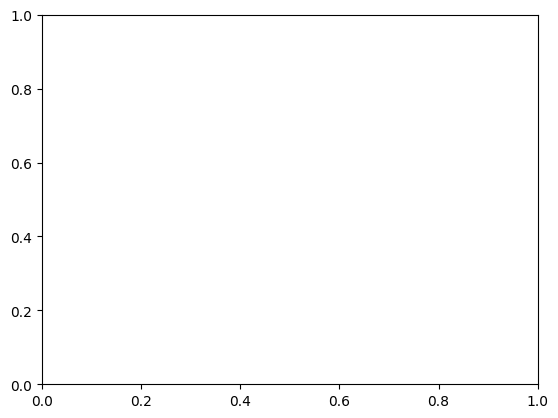

In [163]:
import seaborn as sns
#ax = sns.barplot(data = cars, x='Adv_year', y='Price', ).set(title="Car Prices Over Years", ylabel="")
cars= cars.dropna()
cars = cars.replace('1mile', 1)
cars = cars.replace('Uknown', 14758)

cars = cars.astype({'Runned_Miles':'int'})
cars = cars.astype({'Price':'int'})
sns.lineplot(x=cars["Runned_Miles"], y=cars["Price"])
sns.lineplot(x=cars["Adv_year"], y=cars["Price"])
sns.lineplot(x=cars["Reg_year"], y=cars["Price"])